# QCTO - Workplace Module

### Project Title: Vegetable Price Trends: A Comprehensive Time-Series Analysis
#### Done By: Akhona Nzama

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
<a id="BC"></a>
## **Background Context**  
<a href=#cont>Back to Table of Contents</a>

* **Purpose:**  
   The purpose of this project is to analyze the time-series data of vegetable prices across various regions and periods. By exploring pricing trends, the project aims to provide insights that can be useful for farmers, consumers, policy makers, and market analysts in understanding how prices fluctuate over time. This can assist in forecasting, better planning, and strategic decision-making in agriculture and food markets.

* **Details:**  
   - **Problem Domain:** Price volatility in agricultural markets can impact food security, economic stability, and decision-making for stakeholders. This project focuses on exploring the dynamics of vegetable prices.
   - **Significance:** Tracking the historical price trends and identifying patterns can optimize supply chains, inform policy decisions, and predict future price movements.
   - **Key Questions:**  
     - What trends can be identified in vegetable prices over the given period?  
     - Are there any specific vegetables that experience more volatility in price than others?  
     - How can this data be used to forecast future vegetable prices?  



---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [12]:
#Please use code cells to code in and do not forget to comment your code.
# Importing necessary packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries for time series analysis
from statsmodels.tsa.arima_model import ARIMA
import datetime
# For statistical analysis
import statsmodels.api as sm



---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---



* **Purpose:** This section provides an overview of how the vegetable prices data was collected and describes the dataset's characteristics. It is crucial for understanding the data's context and scope, which will guide the subsequent analysis.

* **Details:** 
  - **Source:** The dataset was sourced from [Agmarknet](https://agmarknet.gov.in/), an authorized portal that tracks agricultural market prices in India. The dataset was made available on Kaggle, providing extensive data on vegetable prices.

  - **Collection Method:** The data was collected through official channels, ensuring its accuracy and relevance. It includes price records for a variety of vegetables over a specific period.

  - **Size and Scope:** 
    - **Number of Rows:** 287
    - **Number of Columns:** 11
    - The dataset spans multiple dates and includes prices for various vegetables. It covers a range of dates and provides detailed price information, which allows for comprehensive time-series analysis.

  - **Column Names and Data Types:**
    - `Price Dates`: Object (string) 
    - `Bhindi (Ladies finger)`: Float64 
    - `Tomato`: Int64 
    - `Onion`: Float64 
    - `Potato`: Int64 
    - `Brinjal`: Int64 
    - `Garlic`: Int64 
    - `Peas`: Int64 
    - `Methi`: Int64 
    - `Green Chilli`: Float64 
    - `Elephant Yam (Suran)`: Int64 

  - **Data Types:**
    - **Numerical Data:** Includes prices of vegetables in various formats (integers and floats).
    - **Categorical Data:** The `Price Dates` column is an object type, representing dates.

  - **Summary Statistics:** 
    - The dataset provides insights into the average prices, variability, and range for each vegetable. For instance, the average price of Bhindi is 29.44 Rupees, while Garlic shows significant variability with prices ranging from 50 to 290 Rupees.

This dataset is a valuable resource for analyzing pricing trends and making forecasts based on historical data.


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [13]:
#Please use code cells to code in and do not forget to comment your code.
# Load the dataset
data_path = 'prices.csv'  
df = pd.read_csv(data_path)

# Check the first few rows of the dataset
print(df.head())

  Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  Garlic  \
0  01-01-2023                    35.0      18   22.0      20       30      50   
1  02-01-2023                    35.0      16   22.0      20       30      55   
2  03-01-2023                    35.0      16   21.0      20       30      55   
3  04-01-2023                    30.0      16   21.0      22       25      55   
4  08-01-2023                    35.0      16   20.0      21       25      55   

   Peas  Methi  Green Chilli  Elephant Yam (Suran)  
0    25      8          45.0                    25  
1    25      7          40.0                    25  
2    25      7          40.0                    25  
3    25      7          40.0                    25  
4    22      6          35.0                    25  


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [14]:
#Please use code cells to code in and do not forget to comment your code.
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Display summary statistics
print("Summary statistics:")
print(df.describe())

# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")



Missing values per column:
Price Dates               0
Bhindi (Ladies finger)    0
Tomato                    0
Onion                     0
Potato                    0
Brinjal                   0
Garlic                    0
Peas                      0
Methi                     0
Green Chilli              0
Elephant Yam (Suran)      0
dtype: int64
Summary statistics:
       Bhindi (Ladies finger)      Tomato       Onion      Potato     Brinjal  \
count              287.000000  287.000000  287.000000  287.000000  287.000000   
mean                29.444251   16.006969   20.649826   18.585366   31.655052   
std                  8.124815    0.118056   11.711204    2.726238   11.725421   
min                 17.000000   16.000000    8.000000   12.000000   14.000000   
25%                 22.000000   16.000000   12.000000   16.000000   25.000000   
50%                 27.500000   16.000000   16.000000   20.000000   30.000000   
75%                 33.000000   16.000000   25.000000   20.000000

In [15]:
# Define a function to remove outliers based on Z-score
def remove_outliers(df, column):
    z_scores = stats.zscore(df[column])
    abs_z_scores = np.abs(z_scores)
    return df[(abs_z_scores < 3)]

# Apply the function to relevant columns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df = remove_outliers(df, column)


In [16]:
# Ensure 'Price Dates' is in datetime format
df['Price Dates'] = pd.to_datetime(df['Price Dates'], errors='coerce')

# Check for any remaining errors or inconsistencies
print("Data types after correction:")
print(df.dtypes)


Data types after correction:
Price Dates               datetime64[ns]
Bhindi (Ladies finger)           float64
Tomato                             int64
Onion                            float64
Potato                             int64
Brinjal                            int64
Garlic                             int64
Peas                               int64
Methi                              int64
Green Chilli                     float64
Elephant Yam (Suran)               int64
dtype: object


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


<Figure size 1000x600 with 0 Axes>

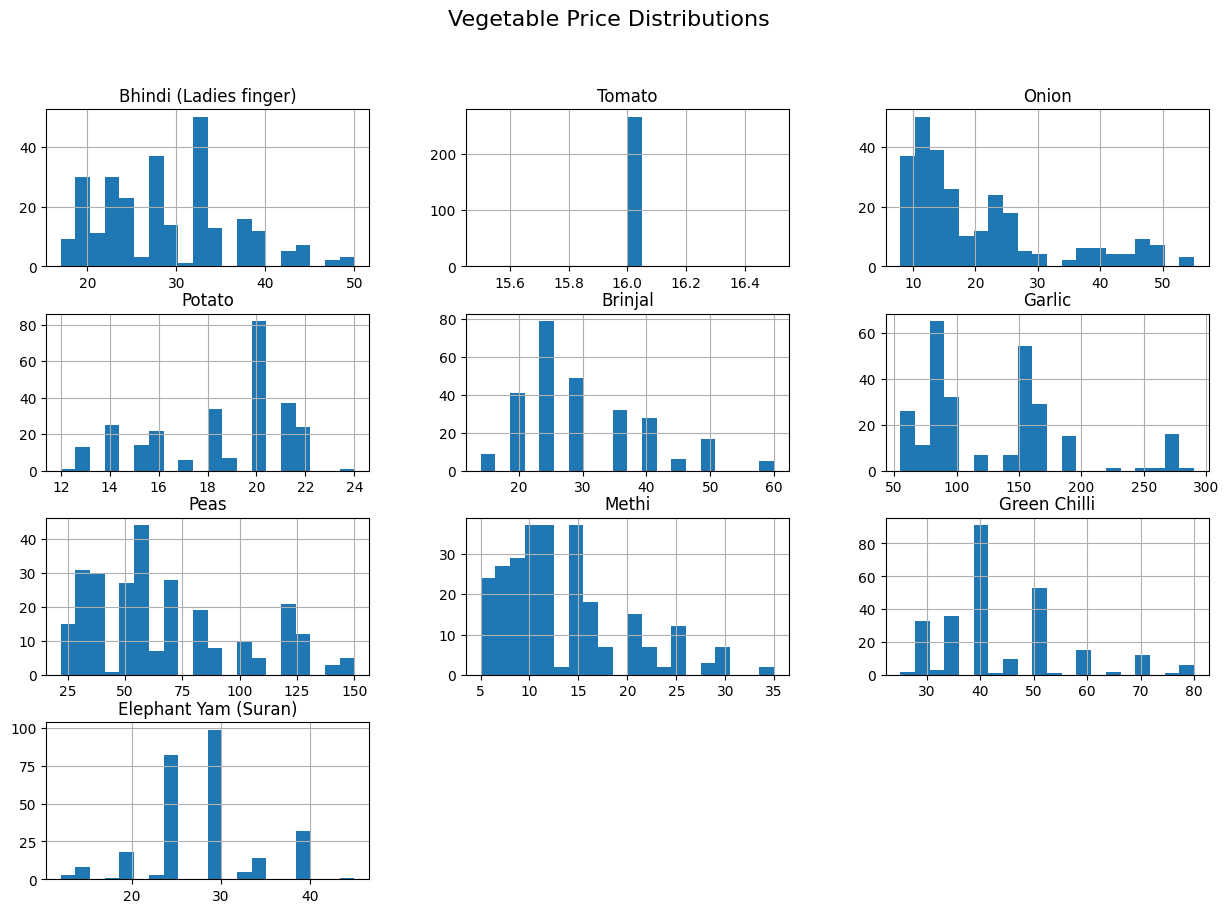

In [27]:

# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Plot histograms for all vegetable price columns
df[['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 
    'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']].hist(bins=20, figsize=(15, 10))
plt.suptitle('Vegetable Price Distributions', fontsize=16)
plt.show()

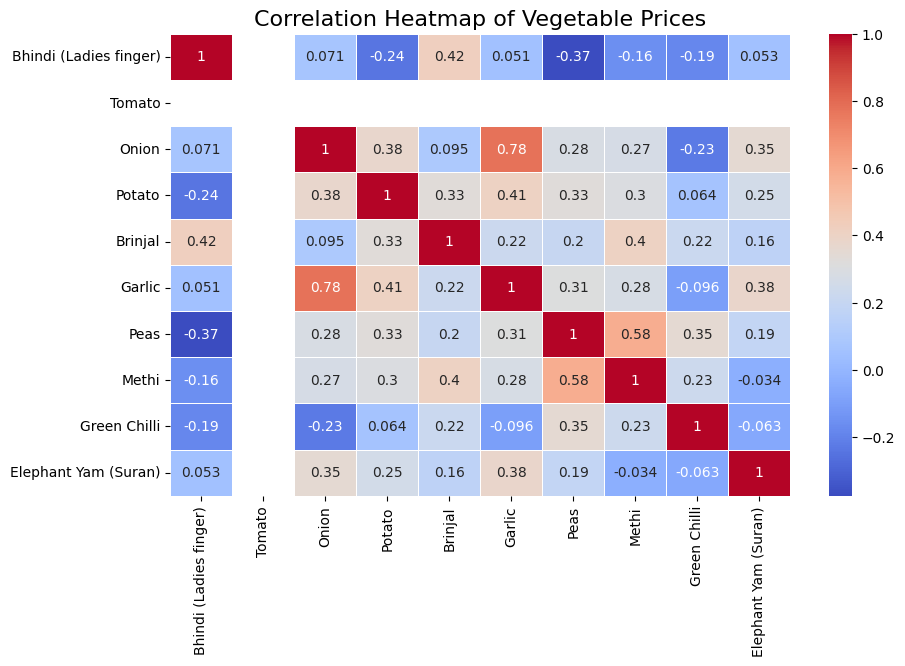

In [28]:
#Please use code cells to code in and do not forget to comment your code.
# Correlation matrix
correlation_matrix = df[['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 
                         'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']].corr()

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Vegetable Prices', fontsize=16)
plt.show()


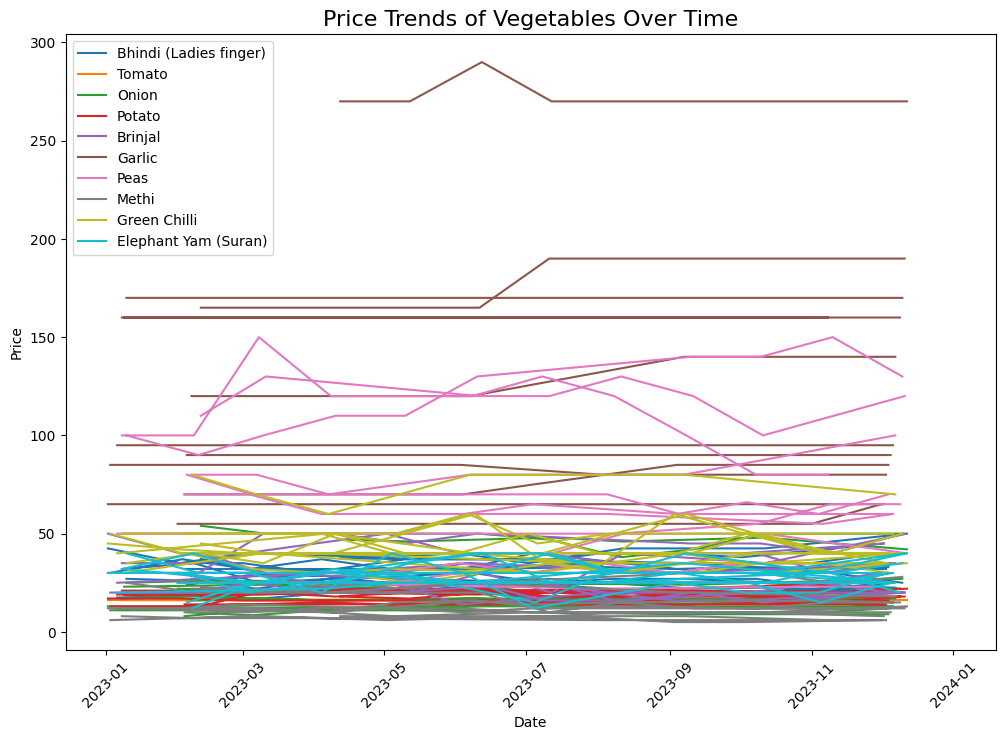

In [29]:
# Convert 'Price Dates' to datetime format
df['Price Dates'] = pd.to_datetime(df['Price Dates'], errors='coerce')

# Plotting price trends for different vegetables over time
plt.figure(figsize=(12, 8))
for column in ['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 'Garlic', 
               'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']:
    plt.plot(df['Price Dates'], df[column], label=column)

plt.legend()
plt.title('Price Trends of Vegetables Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [18]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [19]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [20]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [21]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [22]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.


## Trello and Github link

https://github.com/AkhonaNzama01/Vegetable-Price-Trends.git
https://trello.com/invite/b/66ed5107c2fac978ad9d6c11/ATTIdbc18aaf19ce083c2e358aa239f0963841768682/vegetable-price-trends-project-board